In [9]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special

In [11]:
# neural network class definition
'''构建一个神经网络类，包含初始化函数、训练函数和查询函数'''
class neuralNetwork:
    
    # 初始化神经网络，层数数、节点数和学习率
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes            # 输入层节点
        self.hnodes = hiddennodes           # 隐藏层节点
        self.onodes = outputnodes           # 输出层节点
        
        # 链接各层的权重设置, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # 权重矩阵，i代表上一层，j代表下一层，i输入数量代表列数，j代表行数
         
        # 初始化从输入层到隐藏层的权重矩阵，生成服从正态分布的随机数矩阵，正态分布的均值为0，正态分布的标准差，这里使用节点数的负一半次方作为标准差。这是一种常见的权重初始化方法，称为 Xavier 初始化，它有助于在训练过程中保持输入和输出的方差一致，从而避免梯度消失或梯度爆炸问题。(下同)
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        self.wih_init = self.wih
        self.who_init = self.who
        
        # 设置学习率
        self.lr = learningrate
        
        # 初始化设定激活函数为 Sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # 训练神经网络
    def train(self, inputs_list, targets_list):
        # 将输入列表转换为 二维数组，例如输入列表为 [1,2,3,4] => [[1],[2],[3],[4]]，后转置
        inputs = numpy.array(inputs_list, ndmin=2).T
        # 训练集目标结果列表转换为 二维数组，例如输入列表为 [1,2,3] => [[1],[2],[3]]
        targets = numpy.array(targets_list, ndmin=2).T
        
        # 使用点乘运算，计算隐藏层的结果
        hidden_inputs = numpy.dot(self.wih, inputs)
        self.hidden_nodes = hidden_inputs
        # 计算结果输入激活层，用sigmoid函数加工结果
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 输出层权重矩阵点乘计算结果
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 输出激活层，用sigmoid函数加工结果，得出最终结果
        final_outputs = self.activation_function(final_inputs)
        self.outputs_nodes = final_outputs

        # 输出层误差，是目标值减去最终输出
        output_errors = targets - final_outputs

        # 反向传播误差，隐藏层误差是输出层误差乘以输出层的权重矩阵
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # 更新隐藏层到输出层的权重矩阵
        self.outputs_errors = self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.who += self.outputs_errors

        # 更新输入层到隐藏层之间的权重矩阵
        self.hidden_errors = self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        self.wih += self.hidden_errors

        pass

    
    # 查询训练后(或初始化)的神经网络计算结果
    def query(self, inputs_list):
        # 将输入列表转换为 二维数组，例如输入列表为 [1,2,3,4] => [[1],[2],[3],[4]]，后转置
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # 使用点乘运算，计算隐藏层的结果
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 计算结果输入激活层，用sigmoid函数加工结果
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 输出层权重矩阵点乘计算结果
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 输出激活层，用sigmoid函数加工结果，得出最终结果
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    

In [15]:
# number of input, hidden and output nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

# learning rate is 0.3
learning_rate = 0.3

inputs_list = [1,2,3]
targets_list = [0,1,0]

# 实例化一个3*3的神经网络
net = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
net.train(inputs_list, targets_list)
net.outputs_errors

array([[-0.00144915, -0.01094771, -0.01127112],
       [ 0.00137221,  0.01036646,  0.0106727 ],
       [-0.00157243, -0.0118791 , -0.01223002]])

In [13]:
import matplotlib.pyplot as plt
def plot_neural_network(net):
    plt.figure(figsize=(12, 8))
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

    # 输入层节点
    for i, node in enumerate(range(net.inodes)):
        input_layer = plt.Circle((-4, i*2-2), 0.5, label=f'Input {node+1}', color='lightblue')
        plt.gca().add_patch(input_layer)
        plt.text(-4.2, i*2-2, f'{inputs_list[i]:.2f}', ha='left', va='center')

    # 隐藏层节点
    for i, node in enumerate(range(net.hnodes)):
        Hidden_layer = plt.Circle((0, i*2-2), 0.5, label=f'Hidden {node+1}', color='lightgreen')
        plt.gca().add_patch(Hidden_layer)
        plt.text(-0.2, i*2-2, f'{net.hidden_nodes[i][0]:.2f}', ha='left', va='center')
        
    # 输出层节点
    for i, node in enumerate(range(net.onodes)):
        Output_layer = plt.Circle((4, i*2-2), 0.5, label=f'Output {node+1}', color='lightcoral')
        plt.gca().add_patch(Output_layer)
        plt.text(3.8, i*2-2, f'{net.outputs_nodes[i][0]:.2f}', ha='left', va='center')
        
    # 绘制连接
    for i in range(net.inodes):
        for j in range(net.hnodes):
            plt.plot([-4, 0], [i*2-2, j*2-2], 'k--', linewidth=0.2)  # 输入层到隐藏层
            # plt.text(i-3, j*2-2, f'{net.wih[i][j]:.2f}', ha='left', va='center')
            # 计算连接线的中点
            midpoint_x = -2.8
            midpoint_y = (i-1)*2 + (j-1)*0.5 - (i-1)*0.5
            # 根据连接线的方向调整文本的位置
            plt.text(midpoint_x, midpoint_y, f'{net.wih_init[j][i]:.2f}', ha='right', va='center')
            
            plt.text(-0.8, midpoint_y, f'{net.hidden_errors[j][i]:.2f}', ha='right', va='center', color='lightcoral')

    for i in range(net.hnodes):
        for j in range(net.onodes):
            plt.plot([0, 4], [i*2-2, j*2-2], 'k--', linewidth=0.2)  # 输入层到隐藏层
            # plt.text(i-3, j*2-2, f'{net.wih[i][j]:.2f}', ha='left', va='center')
            # 计算连接线的中点
            midpoint_x = 1.2
            midpoint_y = (i-1)*2 + (j-1)*0.5 - (i-1)*0.5
            # 根据连接线的方向调整文本的位置
            plt.text(midpoint_x, midpoint_y, f'{net.who_init[j][i]:.2f}', ha='right', va='center')

            # 绘制输出层的误差
            plt.text(3.2, midpoint_y, f'{net.outputs_errors[j][i]:.2f}', ha='right', va='center', color='lightcoral')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
    plt.show()

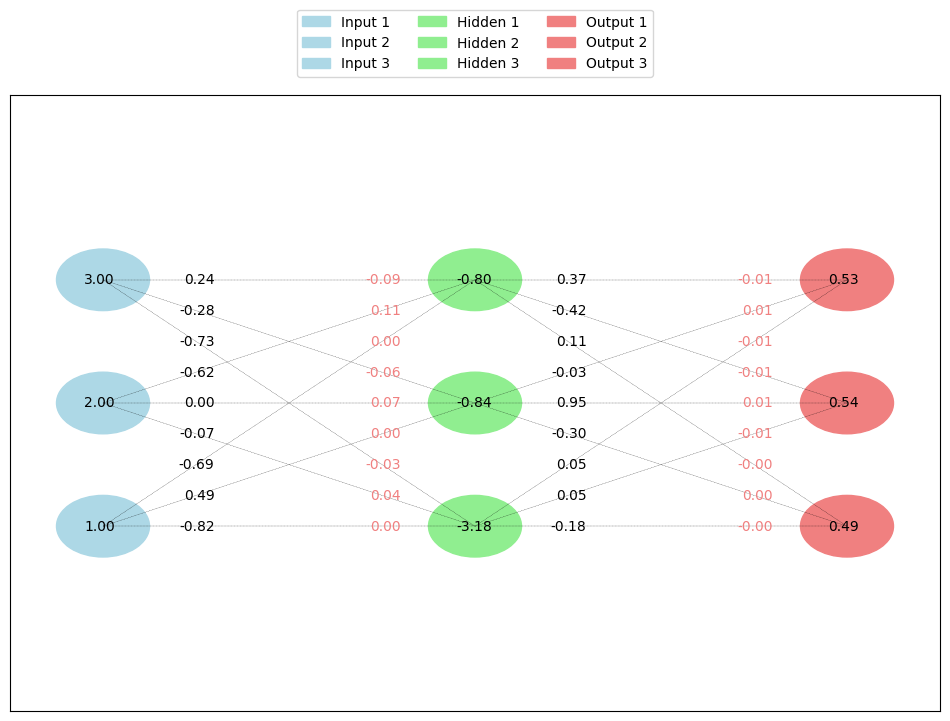

In [16]:
plot_neural_network(net)